<a href="https://colab.research.google.com/github/DanielMelo404/EEG_Markov_model/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyhhmm

In [16]:
import itertools as it
import scipy.spatial.distance as dis
from scipy import signal
import time 
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from scipy.signal import resample
from joblib import Parallel, delayed
import pickle
from sklearn.metrics import pairwise_distances

In [17]:
%%capture
!pip install -U git+https://github.com/UN-GCPDS/python-gcpds.databases.git
!pip install -U git+https://github.com/UN-GCPDS/python-gcpds.utils.git

import gcpds.databases as loaddb

In [18]:
from gcpds.utils import colab
colab.mount()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
db = loaddb.GIGA_MI_ME()
fs = db.metadata['sampling_rate']
channels = db.metadata['channels']
print(channels)
print(db.metadata['classes'])
print(db.metadata['montage'])
print(fs)

['Fp1', 'AF7', 'AF3', 'F1', 'F3', 'F5', 'F7', 'FT7', 'FC5', 'FC3', 'FC1', 'C1', 'C3', 'C5', 'T7', 'TP7', 'CP5', 'CP3', 'CP1', 'P1', 'P3', 'P5', 'P7', 'P9', 'PO7', 'PO3', 'O1', 'Iz', 'Oz', 'POz', 'Pz', 'CPz', 'Fpz', 'Fp2', 'AF8', 'AF4', 'AFz', 'Fz', 'F2', 'F4', 'F6', 'F8', 'FT8', 'FC6', 'FC4', 'FC2', 'FCz', 'Cz', 'C2', 'C4', 'C6', 'T8', 'TP8', 'CP6', 'CP4', 'CP2', 'P2', 'P4', 'P6', 'P8', 'P10', 'PO8', 'PO4', 'O2']
['left hand mi', 'right hand mi', 'left hand mm', 'right hand mm']
standard_1005
512


In [20]:
import pandas as pd
import seaborn as sns
sbj = 1
db.load_subject(sbj) 
run, class_ = db.get_data(classes=['left hand mi', 'right hand mi'])
run.shape, class_.shape

((200, 64, 3584), (200,))

In [21]:
run_ = run[:,:,::10]
run_.shape

(200, 64, 359)

### Hacer PCA para identificar clusters de sujetos

In [22]:

for i in range(50):
    # Cargar sujeto
    db.load_subject(sbj) 
    run, class_ = db.get_data(classes=['left hand mi', 'right hand mi'])
    
    # Decimar
    run = run[:,:,::10]
    
    # Unificar todo en un solo run_
    run_ = np.concatenate((run_,run),axis = 1)

In [23]:
run__ = run_.reshape(200*3264,359)

Standardize along channels

In [24]:
from sklearn.preprocessing import StandardScaler
# Estandariazar cada sujeto
std = StandardScaler()
X_ = std.fit_transform(run__)
X_.shape

(652800, 359)

PCA

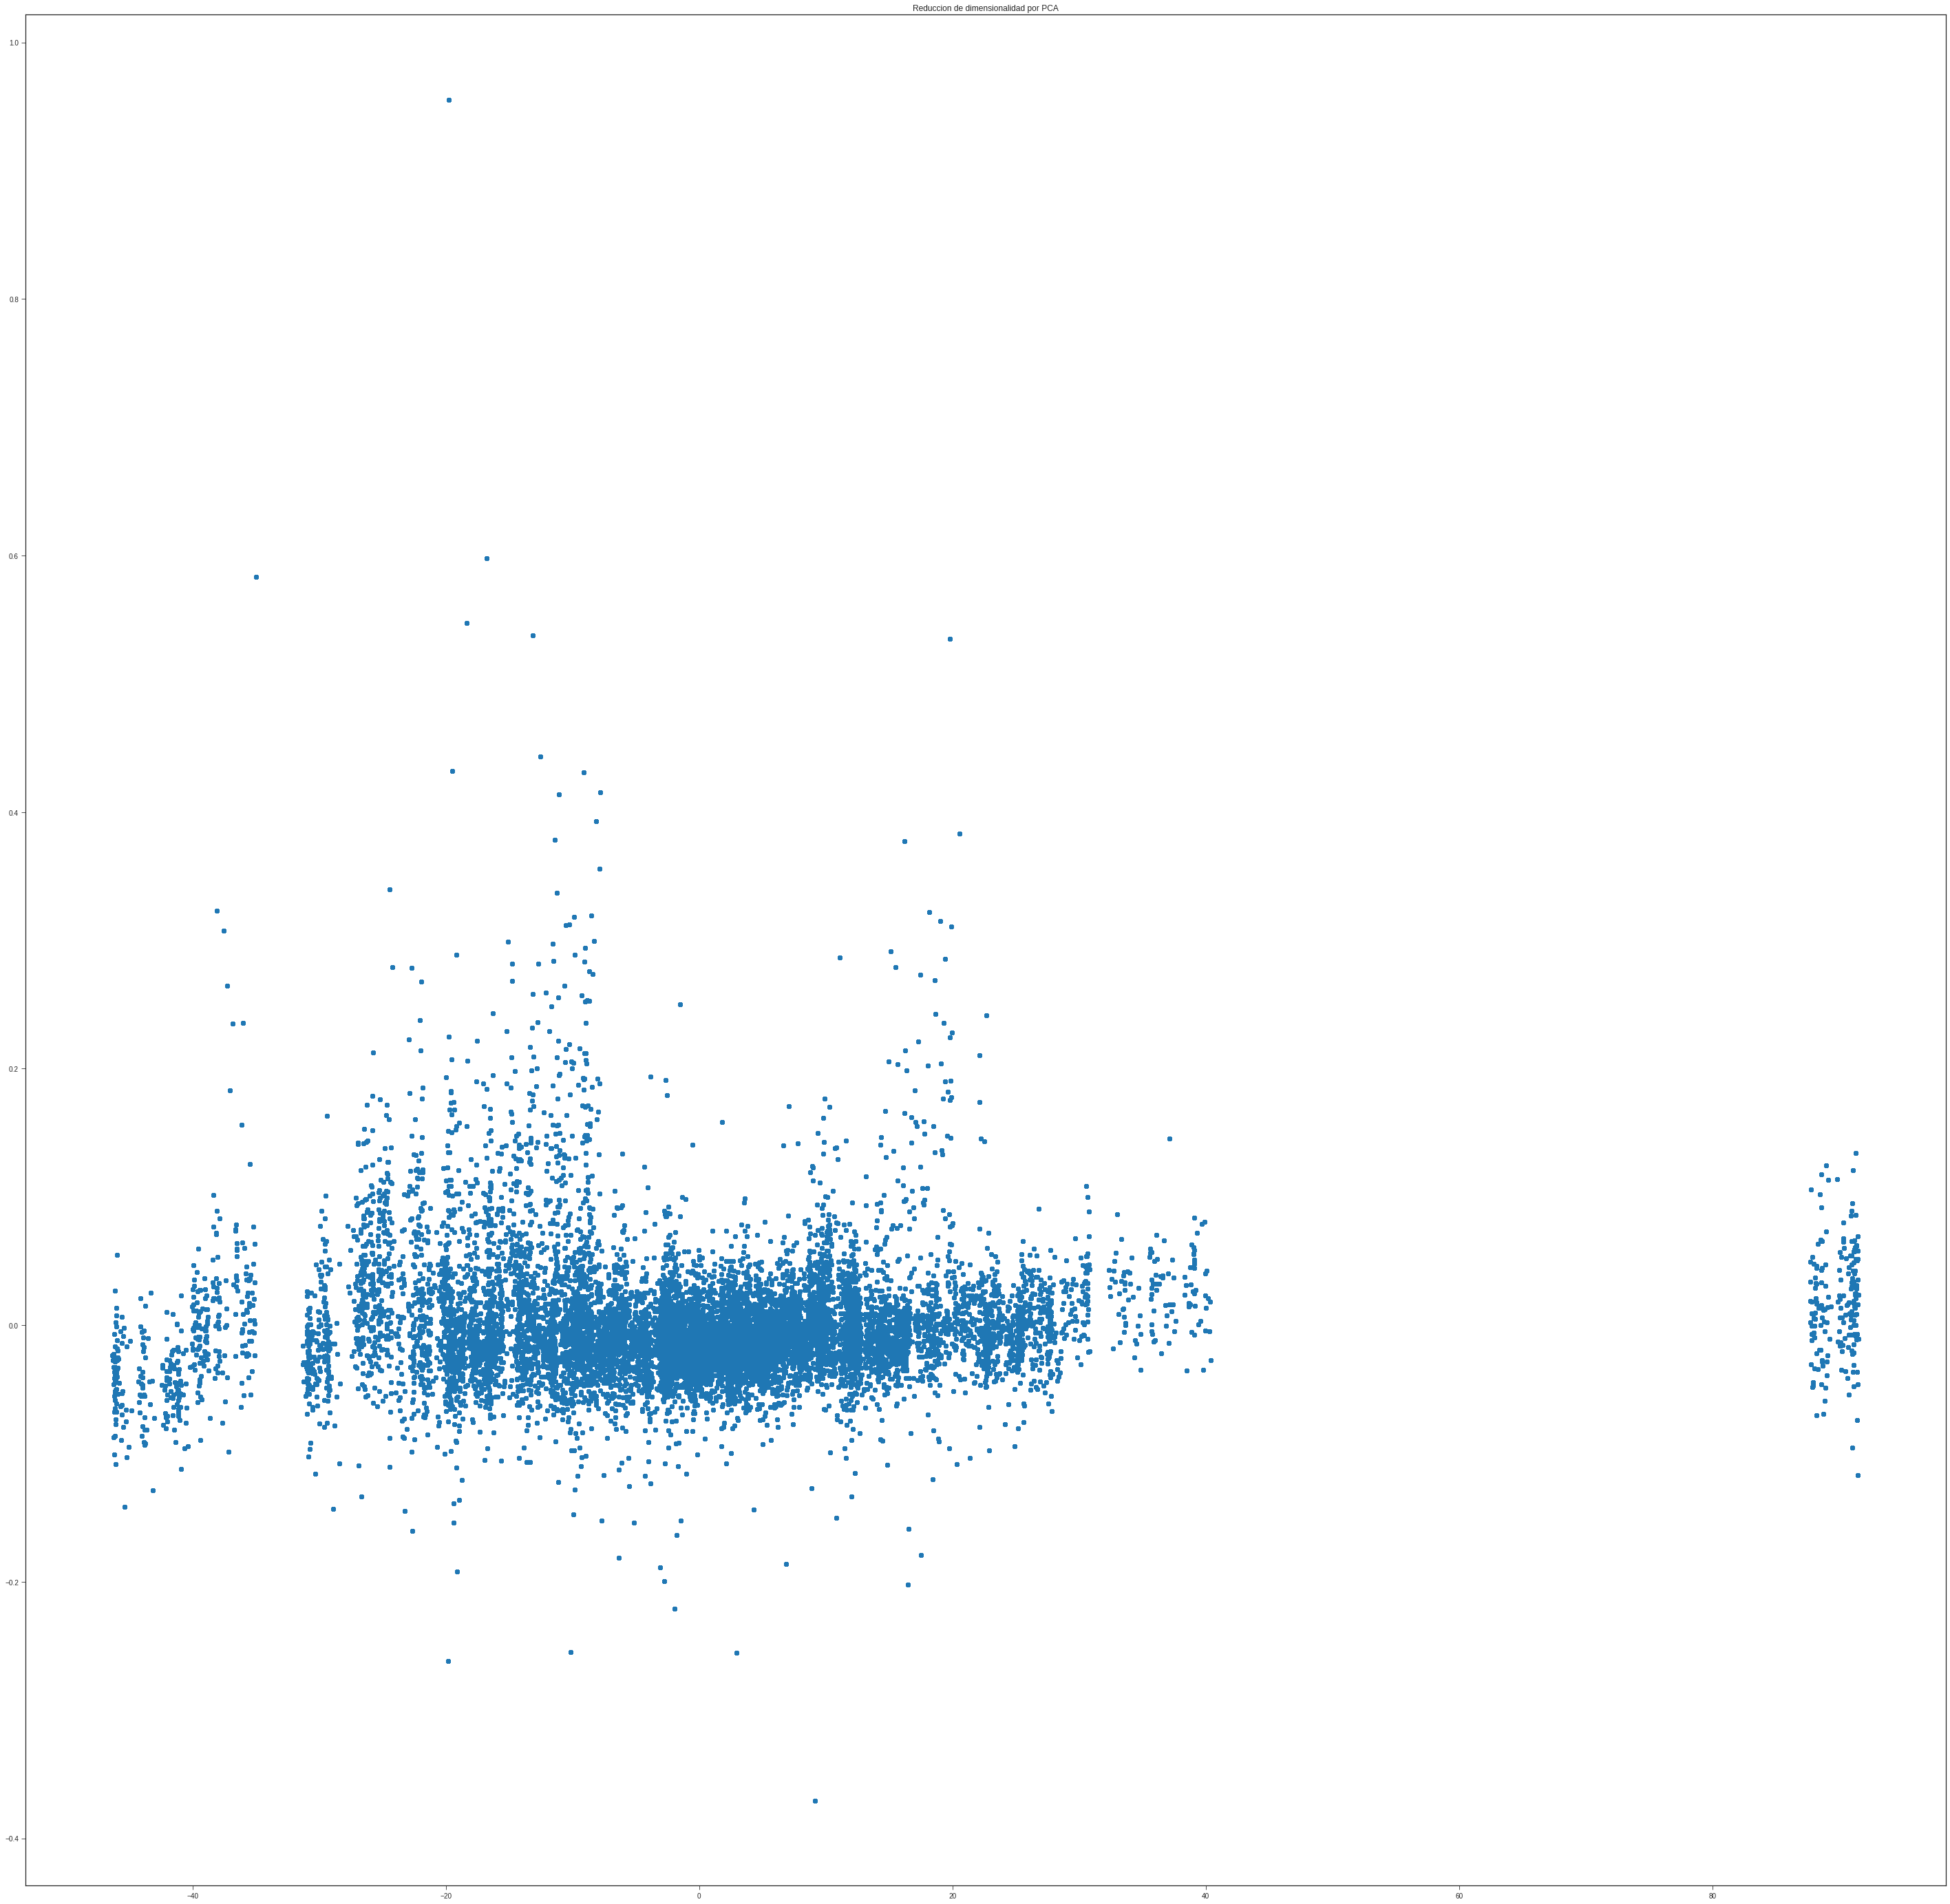

In [26]:
import numpy as np
from sklearn.decomposition import PCA
X = run__
pca = PCA(n_components=2)
PCA(n_components=2)
X_new = pca.fit_transform(X_)
X_new.shape
_ = plt.figure(figsize  = (50,50))
_ = plt.scatter(X_new[:,0],X_new[:,1])
_ = plt.title("Reduccion de dimensionalidad por PCA")